In [10]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
import ncxt_sxtcnn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [3]:
if 0.1:
    print('yes')

yes


In [12]:
import logging

logger = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.ERROR)

<IPython.core.display.Javascript object>

In [13]:
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderx100
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

<IPython.core.display.Javascript object>

### Setup Database

In [15]:
from ncxt_sxtcnn.hxdatabase import Database

db = Database("mockdata/")
membrane = ["membrane"]
nucleus = ["euchromatin", "heterochromatin", "nucleus", "nucleolus"]
nucleolus = ["nucleolus"]
hxfiles = db.filelist(membrane, nucleus, nucleolus)
db.dataframe_sel(membrane, nucleus)

mockdata/


,project,sample,void,void1,nucleus,nucleolus,granule,mitochondria,lipid,endoplasmic reticulum,membrane,ignore
0,pi1,sample_12,0,1,2,3,4,5,6,7,8,9
1,pi2,sample_9,0,,1,5,,3,2,4,6,


<IPython.core.display.Javascript object>

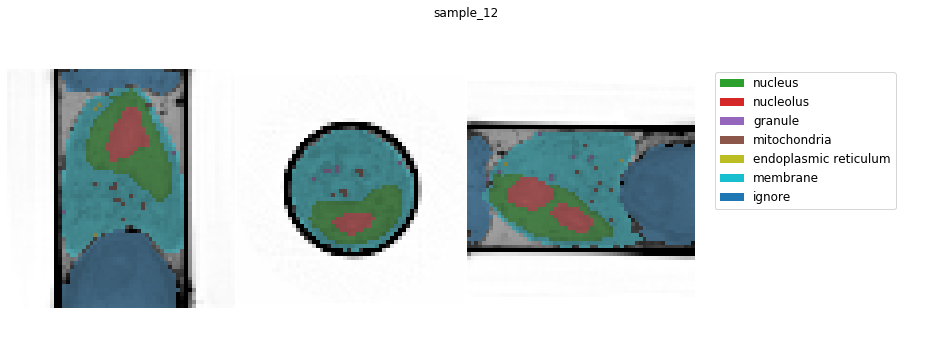

In [5]:
import ncxtamira
proj = ncxtamira.CellProject(hxfiles[0])
proj.preview()

In [6]:
from ncxt_sxtcnn import Segmenter
files = db.filelist(membrane,nucleus,nucleolus)
features = [['*'],nucleus,nucleolus]
working_directory = 'C:/Users/axela/Documents/2020/example_wd/'

loader_args = {'files': files,
             'features': features}

processor_args = {'block_shape': (32, 32, 32),
                  'binning': 1,
                  }

model_args = {
    'num_classes':len(features)+1,
    'depth': 3,
    'start_filts': 32,
    'dropout': None,
    'instancenorm': True,
}
crit_args = dict()
settings = {'maximum_iterations':50}

segmenter = Segmenter(AmiraLoaderx100, 
                      RandomBlockProcessor, 
                      UNet3D, 
                      CrossEntropyLoss_DiceLoss,
                      loader_args,
                      processor_args,
                      model_args,
                      crit_args,
                      settings,
                     )
segmenter.folder = working_directory
segmenter.fold =0
 

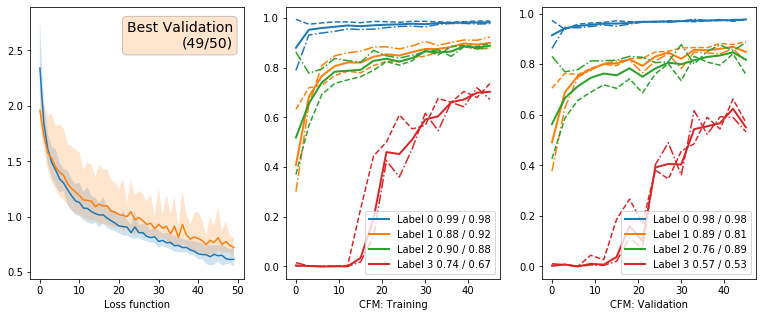

In [7]:
instance = segmenter.sxtcnn(0)
instance.run()
instance.logger.plot()

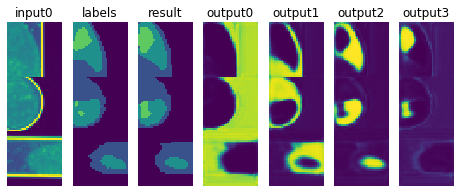

In [8]:
instance.show_training_data()

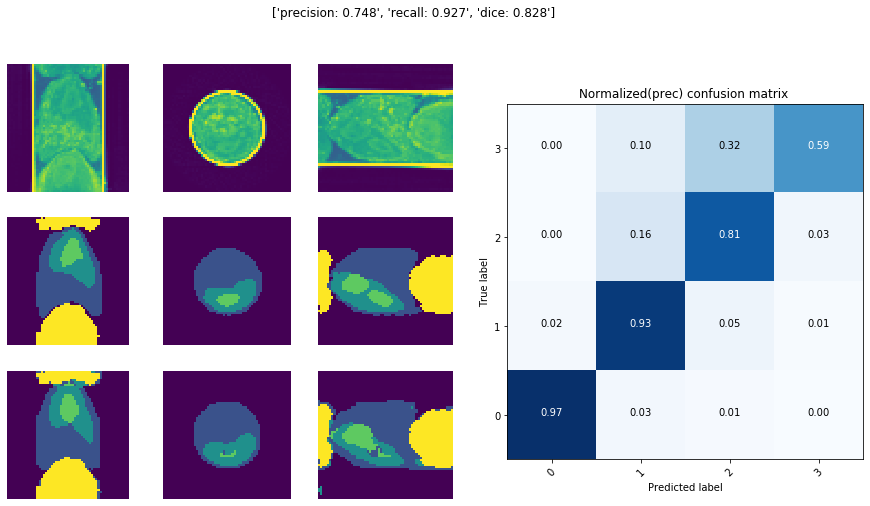

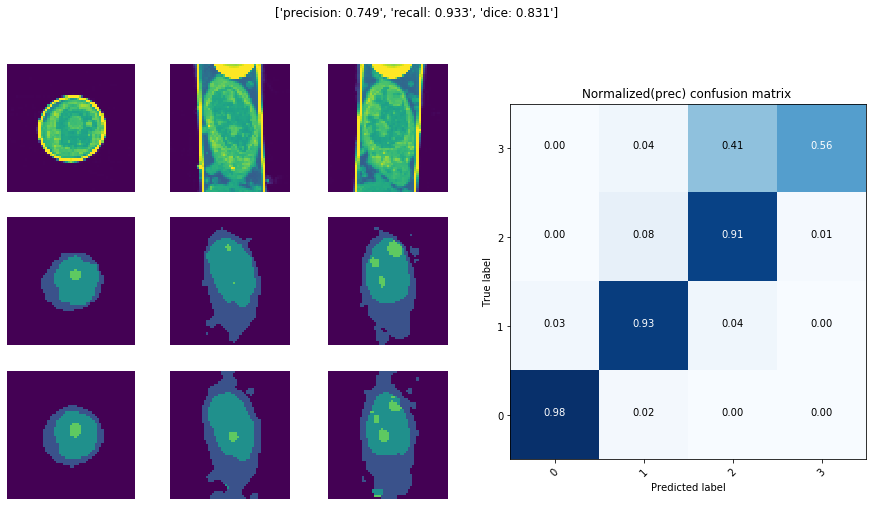

In [9]:
for index in instance.valid_idx:
    _ = instance.evaluate_sample(index, plot=True)